<a href="https://colab.research.google.com/github/SakshamRimal/Deep-Learning/blob/main/05_CNN/DogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [37]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1"

# List the files in the dataset directory
for dirname, _, filenames in os.walk(dataset_path):
     filenames:
        print(os.path.join(dirname, filename))for filename in

/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.11403.jpg
/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.6998.jpg
/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.3190.jpg
/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.2297.jpg
/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.5659.jpg
/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.11805.jpg
/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.9381.jpg
/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.11487.jpg
/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.3362.jpg
/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.5363.jpg
/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.10897.jpg
/root/.cache/kagglehub/datas

In [38]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout

In [39]:
# generators ekchot nai sabai load nagari small small batches ma kam garna milxa esma chai
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train',
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [40]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/test',
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


In [41]:
# normalize garne sabai pizel values chai 0-1 ko bich ma hos bhanera
def process(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [42]:
# now making a cnn model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid' ,activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2 , padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2 , padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2 , padding='valid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.add(Flatten())
model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [45]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [47]:
history = model.fit(train_ds , epochs=10 , validation_data = validation_ds )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.5634 - loss: 1.7630 - val_accuracy: 0.6642 - val_loss: 0.6203
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 76ms/step - accuracy: 0.6758 - loss: 0.6075 - val_accuracy: 0.7306 - val_loss: 0.5392
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.7357 - loss: 0.5323 - val_accuracy: 0.7700 - val_loss: 0.4759
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7230 - loss: 0.5790 - val_accuracy: 0.7718 - val_loss: 0.4728
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7965 - loss: 0.4433 - val_accuracy: 0.7650 - val_loss: 0.5198
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.8291 - loss: 0.3858 - val_accuracy: 0.7628 - val_loss: 0.5119
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8594 - loss: 0.3247 - val_accuracy: 0.7188 - val_loss: 0.7529
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.8860 - loss: 0.2715 - 

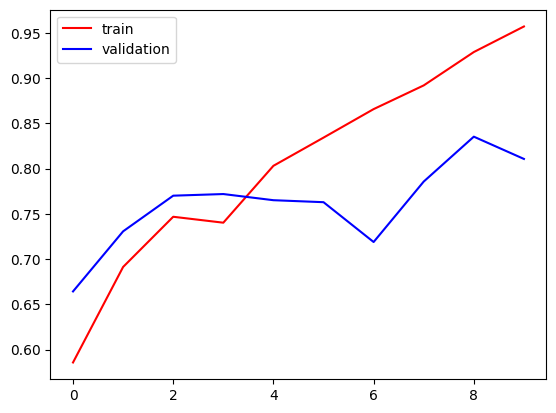

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color='red' , label='train')
plt.plot(history.history['val_accuracy'] , color='blue' , label='validation')
plt.legend()
plt.show()

In [49]:
#there is overfitting
#- data augmentation
#- L1/L2 regularization
#- Dropout
#- Batch Normalization

In [67]:
import cv2


In [96]:
test_img = cv2.imread('/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.6998.jpg')

# Check if the image was loaded successfully
if test_img is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


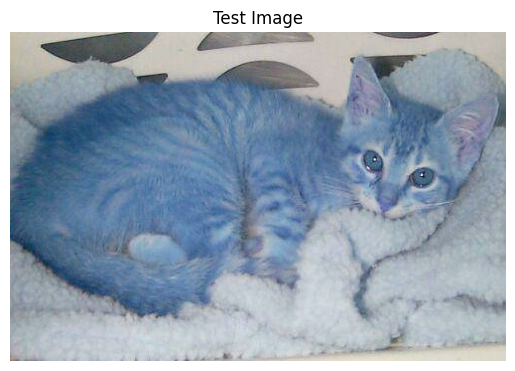

In [97]:
# Check if the image was loaded successfully before displaying
if test_img is not None:
    plt.imshow(test_img)
    plt.title("Test Image")
    plt.axis('off') # Hide axes
    plt.show()
else:
    print("Cannot display image because it failed to load.")

In [98]:
test_img.shape

(332, 500, 3)

In [99]:
test_image = cv2.resize(test_img, (256,256))

In [100]:
test_input = test_image.reshape((1,256,256,3))

In [103]:
#print dog or cat instead of 1 and 0
if model.predict(test_input) > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Cat
